Prepoceso y mapeo de los labels.

In [15]:
#PREPROCESO DE TEXTO COMÚN
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import os
# Obtén la ruta al directorio actual del script o del cuaderno de Jupyter
current_directory = os.getcwd()
# O bien
# current_directory = os.getcwd()  # Para cuadernos de Jupyter

# Agrega la ruta actual a nltk.data.path
nltk.data.path.append(current_directory)

# Ahora intenta descargar el recurso 'wordnet'
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
def remove_special_characters(text):
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def to_lowercase(text):
    return text.lower()



def tokenize_text(text):
    return word_tokenize(text)


def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]


def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]
def recompose_text(tokens):
    return ' '.join(tokens)
def mapeo(train):
    mapeo = {
    'Diarrhea/Dysentery': 'Certain infectious and Parasitic Diseases',
    'Other infectious diseases': 'Certain infectious and Parasitic Diseases',
    'AIDS': 'Certain infectious and Parasitic Diseases',
    'Sepsis': 'Certain infectious and Parasitic Diseases',
    'Meningitis': 'Certain infectious and Parasitic Diseases',
    'Meningitis/Sepsis': 'Certain infectious and Parasitic Diseases',
    'Malaria': 'Certain infectious and Parasitic Diseases',
    'Encephalitis': 'Certain infectious and Parasitic Diseases',
    'Measles': 'Certain infectious and Parasitic Diseases',
    'Hemorrhagic Fever': 'Certain infectious and Parasitic Diseases',
    'TB': 'Certain infectious and Parasitic Diseases',
    'Leukemia/Lymphomas': 'Neoplasms',
    'Colorectal Cancer': 'Neoplasms',
    'Lung Cancer': 'Neoplasms',
    'Cervical Cancer': 'Neoplasms',
    'Breast Cancer': 'Neoplasms',
    'Stomach Cancer': 'Neoplasms',
    'Prostate Cancer': 'Neoplasms',
    'Esophageal Cancer': 'Neoplasms',
    'Other Cancers': 'Neoplasms',
    'Diabetes': 'Endocrine, Nutritional and Metabolic Diseases',
    'Epilepsy': 'Diseases of the Nervous System',
    'Stroke': 'Diseases of the circulatory system',
    'Acute Myocardial Infarction': 'Diseases of the circulatory system',
    'Pneumonia': 'Diseases of Respiratory System',
    'Asthma': 'Diseases of Respiratory System',
    'COPD': 'Diseases of Respiratory System',
    'Cirrhosis': 'Diseases of the Digestive System',
    'Other Digestive Diseases': 'Diseases of the Digestive System',
    'Renal Failure': 'Diseases of the Genitourinary System',
    'Preterm Delivery': 'Pregnancy, childbirth and the puerperium',
    'Stillbirth': 'Pregnancy, childbirth and the puerperium',
    'Maternal': 'Pregnancy, childbirth and the puerperium',
    'Birth Asphyxia': 'Pregnancy, childbirth and the puerperium',
    'Congenital Malformations': 'Congenital Malformations',
    'Bite of Venomous Animal': 'Injury, Poisoning and External Causes',
    'Poisonings': 'Injury, Poisoning and External Causes',
    'Road Traffic': 'External Causes of Morbidity and Mortality',
    'Falls': 'External Causes of Morbidity and Mortality',
    'Homicide': 'External Causes of Morbidity and Mortality',
    'Fires': 'External Causes of Morbidity and Mortality',
    'Drowning': 'External Causes of Morbidity and Mortality',
    'Suicide': 'External Causes of Morbidity and Mortality',
    'Violent Death': 'External Causes of Morbidity and Mortality',
    'Other injuries': 'External Causes of Morbidity and Mortality'
}
    trainM=train
# Aplicar el mapeo a la columna 'gs_text34'
    trainM['gs_text34'] = trainM['gs_text34'].replace(mapeo)
    return (trainM)

[nltk_data] Downloading package wordnet to /home/alvaro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/alvaro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/alvaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
from scipy.sparse import hstack

# Cargar tus datos en un DataFrame de pandas (asegúrate de tener las bibliotecas instaladas)
# df_train = pd.read_csv('ruta/del/archivo.csv')
train_file = 'verbalAutopsy_train.csv'
test_file = 'verbalAutopsy_test.csv'
train = pd.read_csv(train_file)
train=mapeo(train)
y_train = train['gs_text34']

# Preprocesamiento de texto
train["open_response"] = train["open_response"].apply(remove_special_characters)
train["open_response"] = train["open_response"].apply(to_lowercase)
train["open_response"] = train["open_response"].apply(tokenize_text)
train["open_response"] = train["open_response"].apply(remove_stopwords)
train["open_response"] = train["open_response"].apply(lemmatize_tokens)
train["open_response"] = train["open_response"].apply(recompose_text)
# Seleccionar las columnas 'age', 'sex' y 'open_response'
#train = train[['age', 'sex', 'open_response']]
vectorizer = TfidfVectorizer( stop_words='english', max_df=0.85, min_df=0.05, sublinear_tf=True)
texto = vectorizer.fit_transform(train["open_response"])
#train["open_response"]=texto
module_mapping = {"Neonate": 0, "Child": 1, "Adult": 2}
train['module'] = train['module'].map(module_mapping)
texto_cp=texto.copy()
# Inicializar el MinMaxScaler
min_max_scaler = MinMaxScaler()
# Estandarizar las columnas numéricas por separado
# Realizar una copia de los datos originales
train_copy = train.copy()

#X_numeric = min_max_scaler.fit_transform(train[['age', 'sex','module']])
X_numeric=train[['module','sex']]
# Fusionar las características de texto y las columnas numéricas
X_train = hstack([texto, X_numeric])
X_train_base=hstack([texto_cp])
y_train_base=train_copy['gs_text34']

Entrenamiento de los modelos y graficación

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc

def evaluate_classification_models(X_train, y_train):
    # Obtener todos los valores únicos de y_train
    unique_labels = y_train.unique()
    print(unique_labels)

    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Entrenar modelos
    rf_model = RandomForestClassifier(random_state=42)
    nb_model = MultinomialNB()
    lr_model = LogisticRegression(random_state=42)

    models = [rf_model, nb_model, lr_model]
    model_names = ['Random Forest', 'Naive Bayes', 'Logistic Regression']

    # Definir listas para almacenar las métricas
    accuracies = []
    precisions = []
    recalls = []
    classification_reports = []
    f_scores = []

    # Ajustar el tamaño de la figura para las curvas ROC
    plt.figure(figsize=(12, 8))

    roc_curves = []

    for model, name in zip(models, model_names):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Almacenar métricas
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f_scores.append(f1)

        # Calcular matriz de confusión
        cm = confusion_matrix(y_test, y_pred)

        # Visualizar la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=unique_labels, yticklabels=unique_labels)
        plt.xlabel("Predicciones")
        plt.ylabel("Valores Verdaderos")
        plt.title(f"Matriz de Confusión - {name}")
        plt.show()

        y_scores = model.predict_proba(X_test)  # Probabilidades de predicción

        # Calcular el área bajo la curva ROC
        roc_auc = roc_auc_score(y_test, y_scores, average='weighted', multi_class='ovr')

        # Visualizar la curva ROC
        plot_roc_curve(y_test, y_scores, title=f'ROC Curve - {name}, AUC={roc_auc}', ax=plt.gca())
        roc_curves.append(f'{name} (AUC = {roc_auc:.2f})')  # Agregar leyenda
        # Agregar leyenda a la derecha de la gráfica
        plt.legend([f'{name} (AUC = {roc_auc:.2f})'], loc='center left', bbox_to_anchor=(1, 0.5))

        # Mostrar la gráfica
        plt.show()

    # Visualizar F-scores
    plt.figure(figsize=(10, 5))
    plt.bar(model_names, f_scores, color=['blue', 'green', 'red'])
    plt.title('F-score Comparison')
    plt.xlabel('Models')
    plt.ylabel('F-score')
    plt.show()

        # Visualizar otras métricas
    # Visualizar métricas
    bar_width = 0.2
    index = np.arange(len(model_names))

    plt.figure(figsize=(12, 8))

    # Barra para Accuracy
    plt.bar(index - bar_width, accuracies, width=bar_width, color=['blue'], alpha=0.7, label='Accuracy')

    # Barra para Precision
    plt.bar(index, precisions, width=bar_width, color=[ 'green'], alpha=0.7, label='Precision')

    # Barra para Recall
    plt.bar(index + bar_width, recalls, width=bar_width, color=['red'], alpha=0.7, label='Recall')

    # Configuración de leyendas y etiquetas
    plt.legend()
    plt.title('Metric Comparison')
    plt.xlabel('Models')
    plt.ylabel('Metric Value')

    # Ajustar las etiquetas en el eje x para que coincidan con las barras
    plt.xticks(index, model_names)

    # Mostrar la gráfica
    plt.show()


Evaluación de solo texto

['Diseases of Respiratory System'
 'Pregnancy, childbirth and the puerperium' 'Other Injuries'
 'Injury, Poisoning and External Causes' 'Neoplasms'
 'Diseases of the circulatory system' 'Other Non-communicable Diseases'
 'Other Infectious Diseases' 'Certain infectious and Parasitic Diseases'
 'External Causes of Morbidity and Mortality'
 'Other Cardiovascular Diseases' 'Congenital malformation'
 'Diseases of the Digestive System' 'Diseases of the Genitourinary System'
 'Endocrine, Nutritional and Metabolic Diseases' 'Birth asphyxia'
 'Other Defined Causes of Child Deaths' 'Hemorrhagic fever'
 'Diseases of the Nervous System']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1200x800 with 0 Axes>

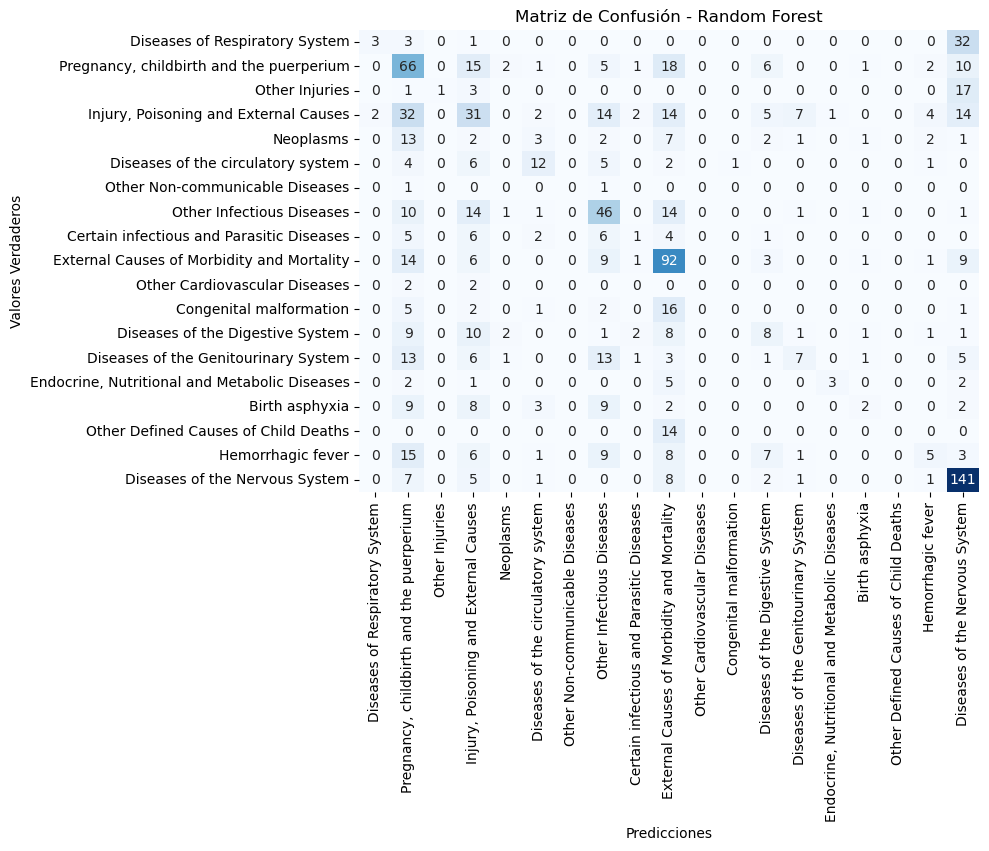

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


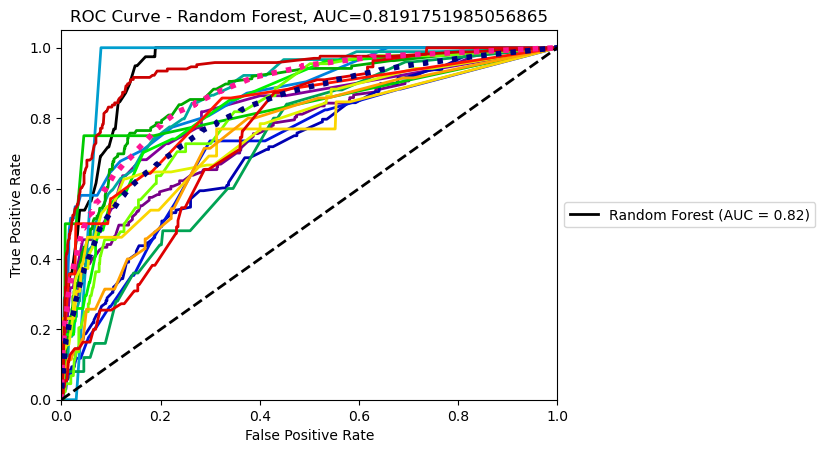

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


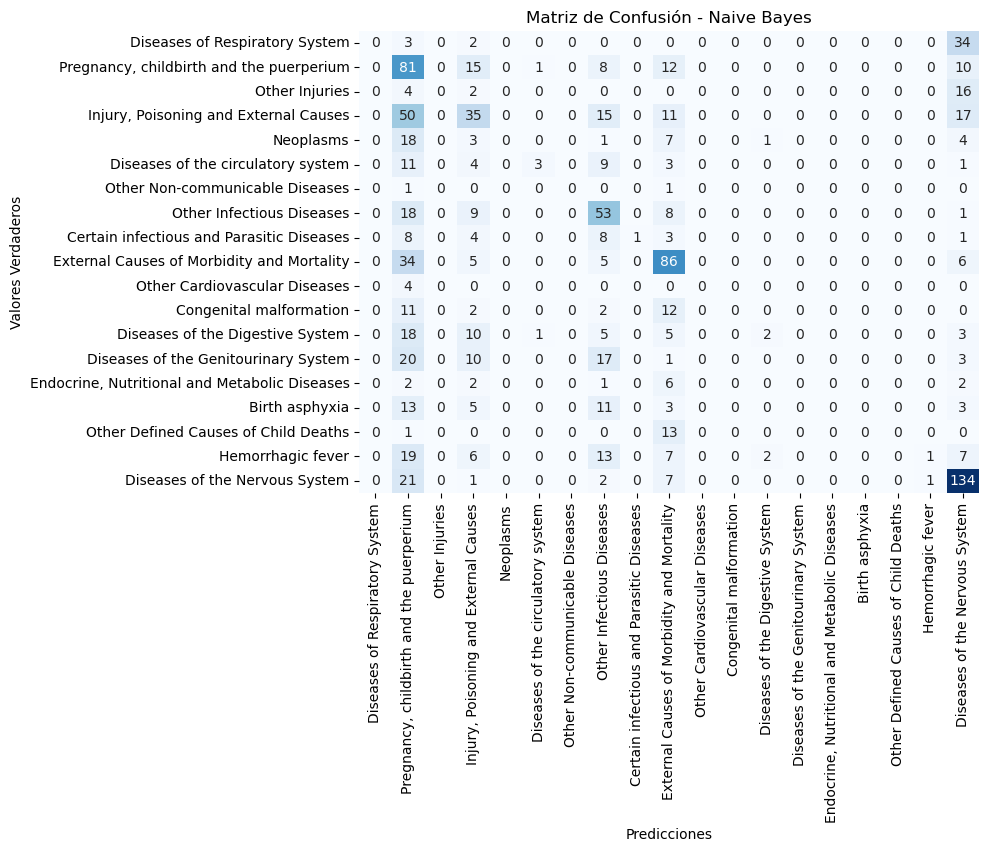

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


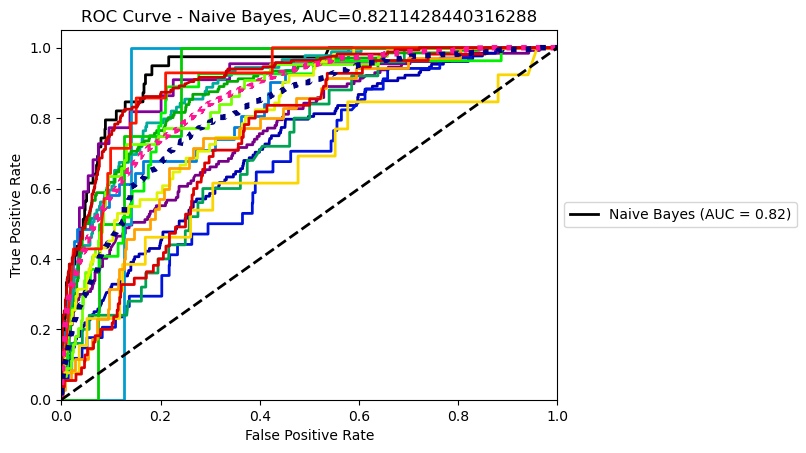

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


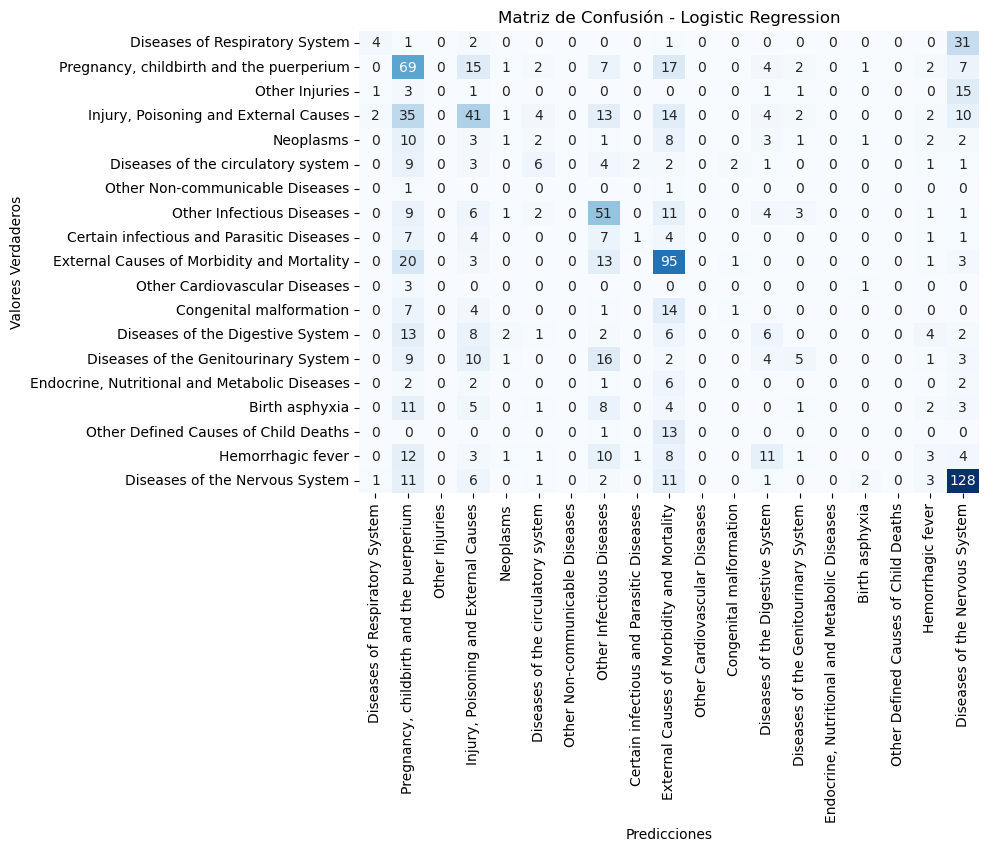

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


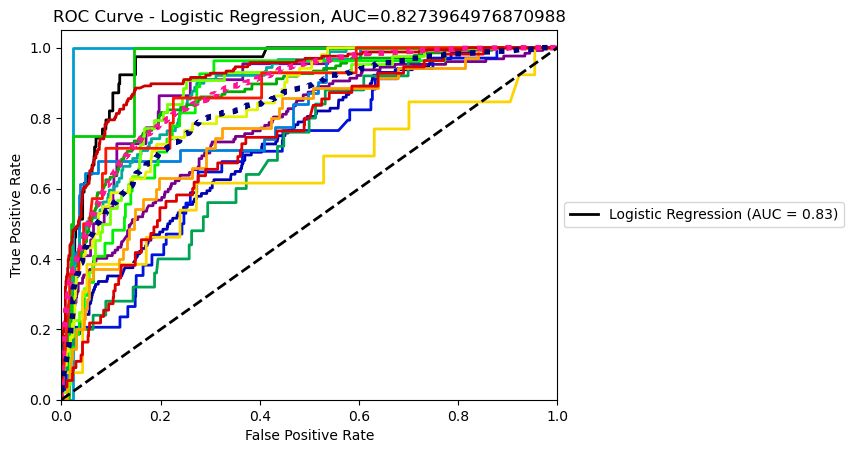

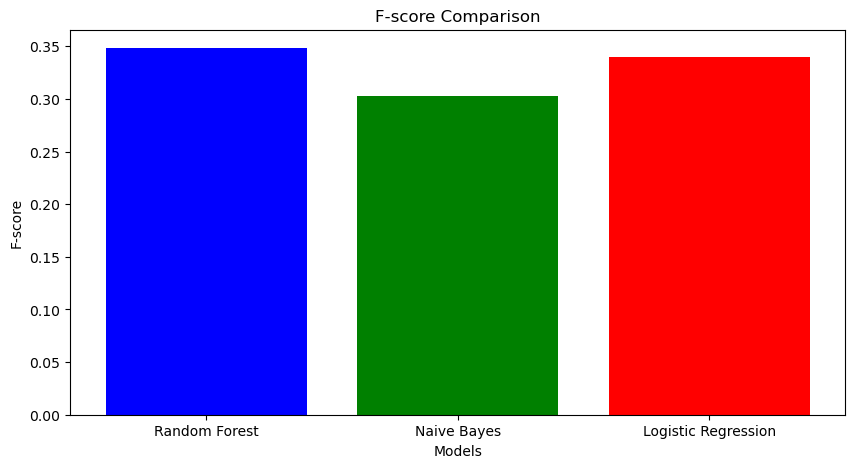

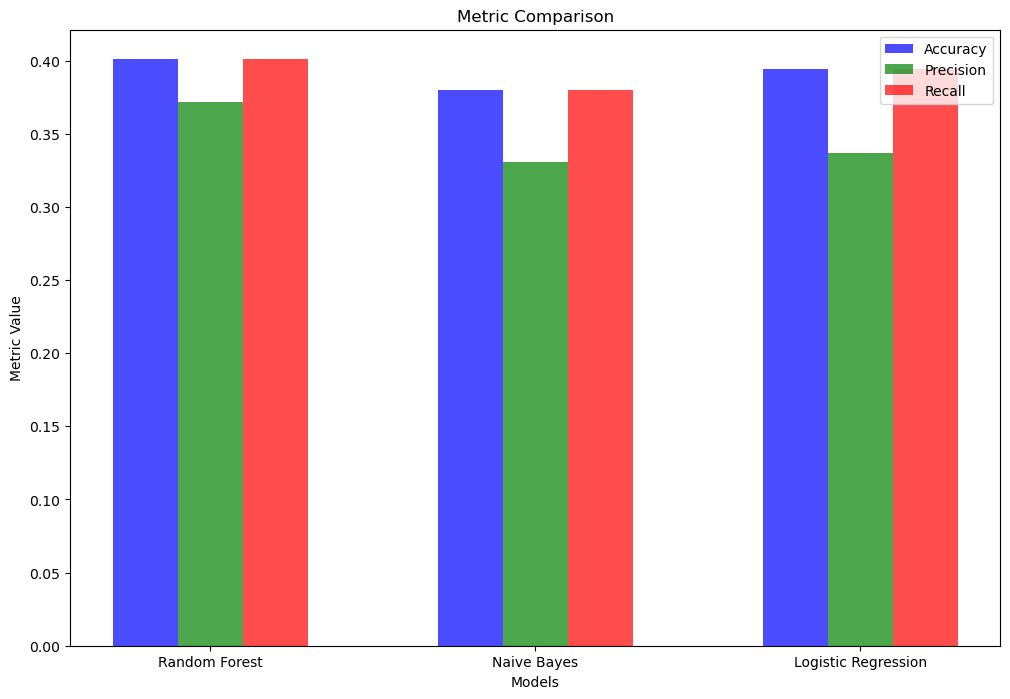

In [18]:

# Obtener todos los valores únicos de y_train
evaluate_classification_models(X_train_base,y_train_base)

Evaluación con más caracteristicas ("module","age" y "sex")

['Diseases of Respiratory System'
 'Pregnancy, childbirth and the puerperium' 'Other Injuries'
 'Injury, Poisoning and External Causes' 'Neoplasms'
 'Diseases of the circulatory system' 'Other Non-communicable Diseases'
 'Other Infectious Diseases' 'Certain infectious and Parasitic Diseases'
 'External Causes of Morbidity and Mortality'
 'Other Cardiovascular Diseases' 'Congenital malformation'
 'Diseases of the Digestive System' 'Diseases of the Genitourinary System'
 'Endocrine, Nutritional and Metabolic Diseases' 'Birth asphyxia'
 'Other Defined Causes of Child Deaths' 'Hemorrhagic fever'
 'Diseases of the Nervous System']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1200x800 with 0 Axes>

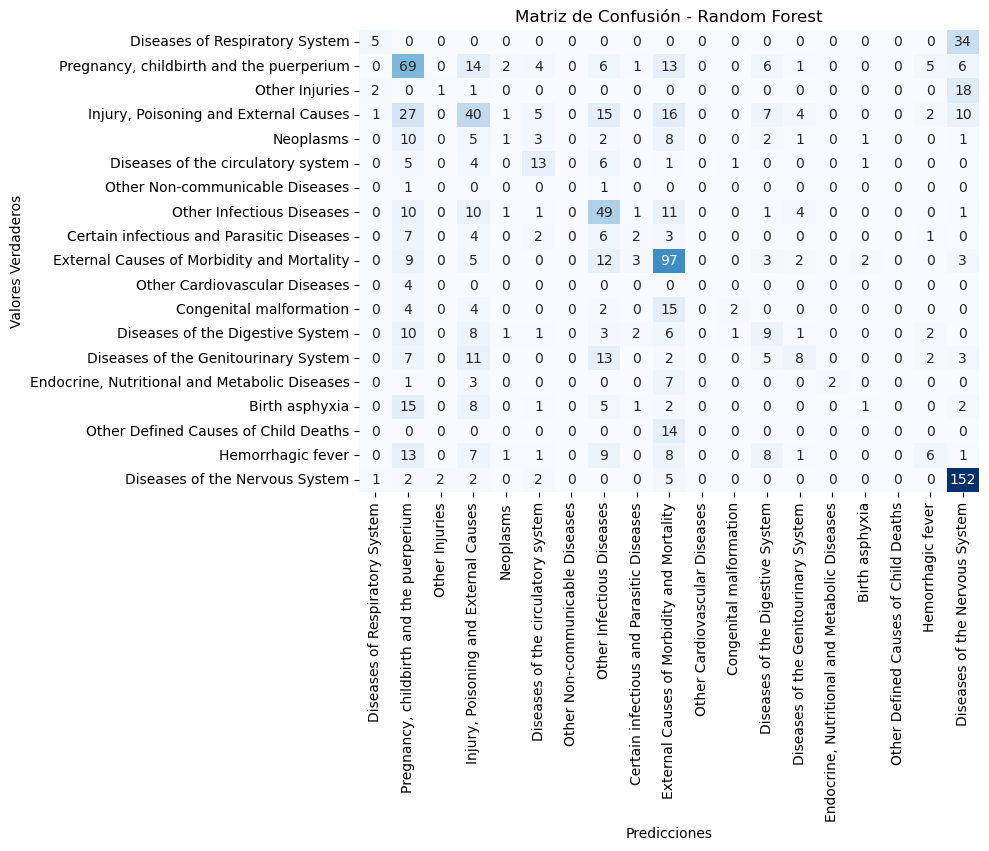

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


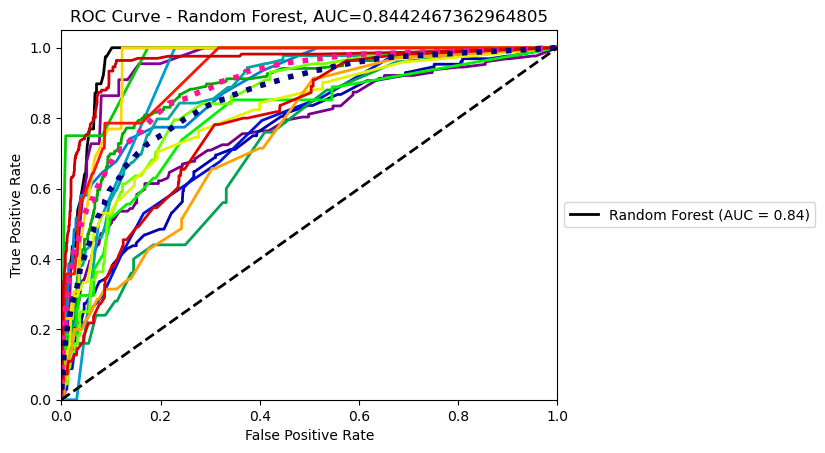

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


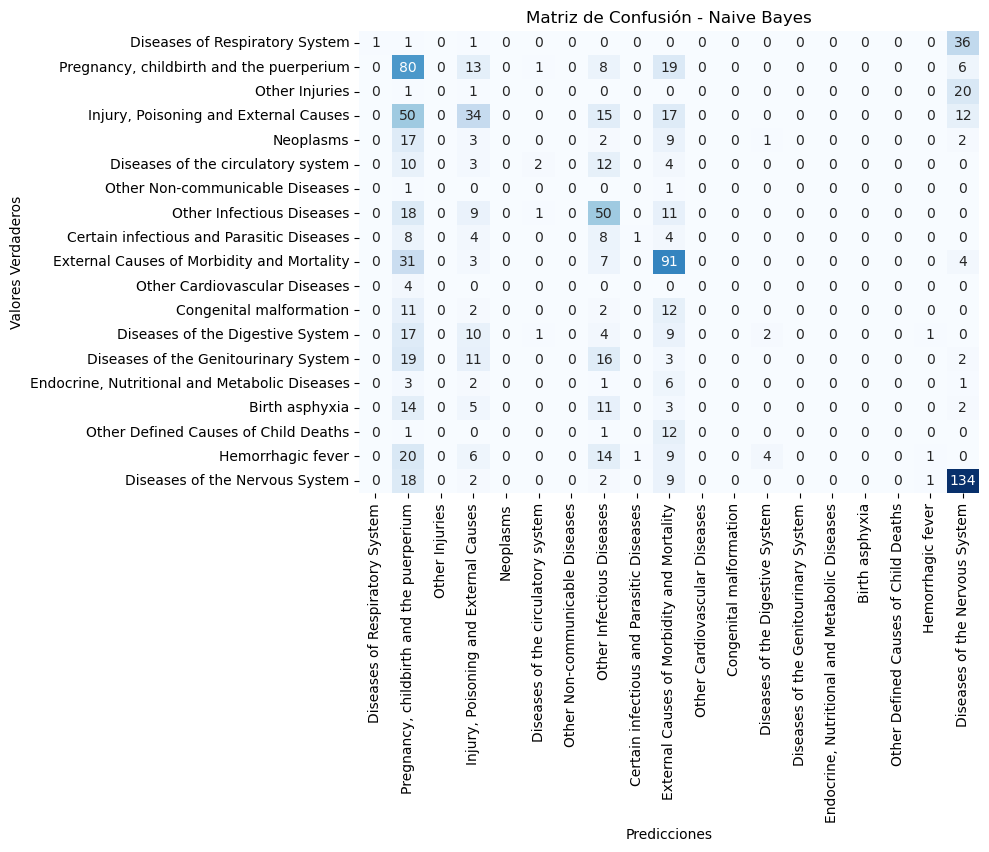

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


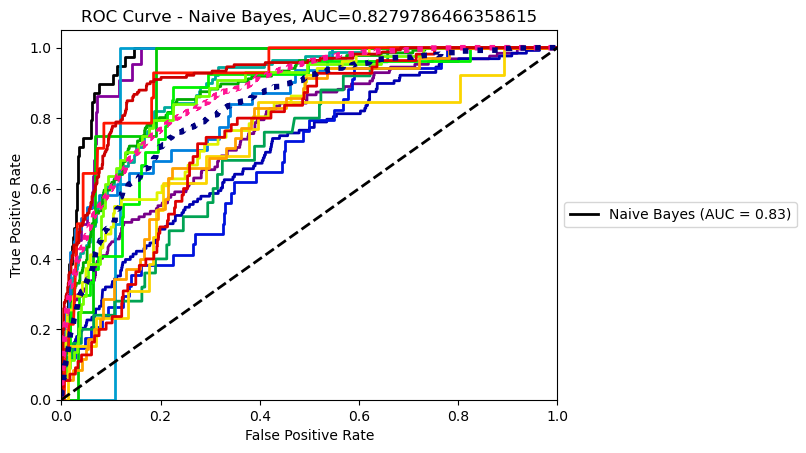

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


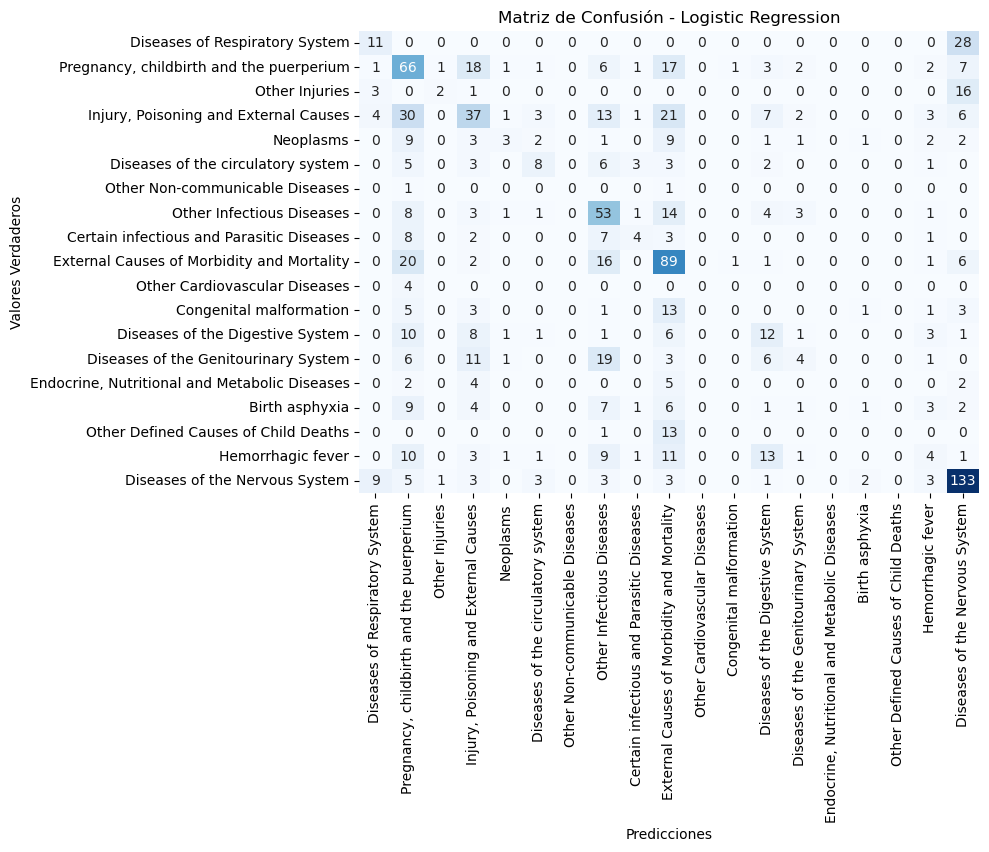

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


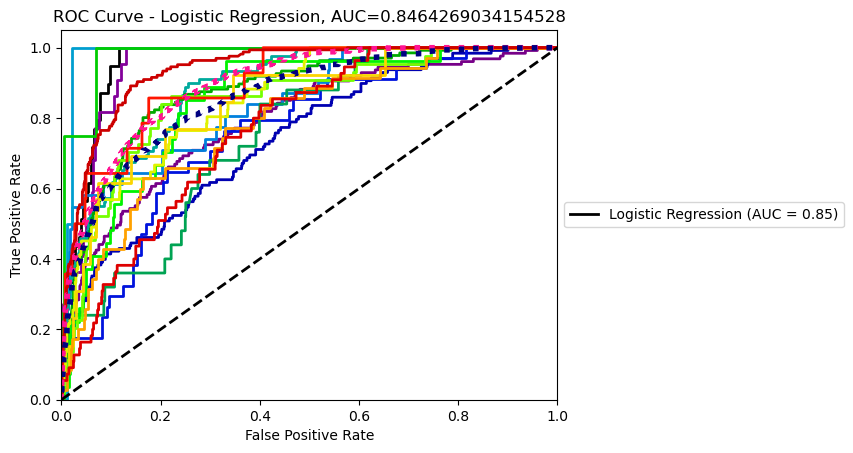

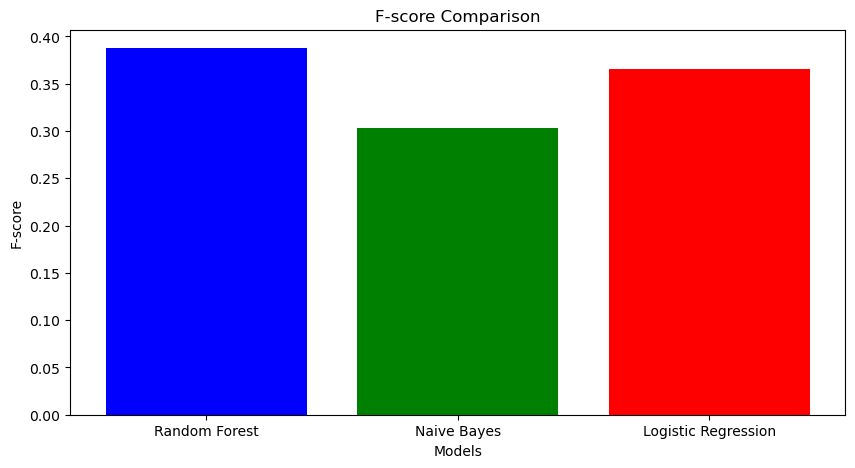

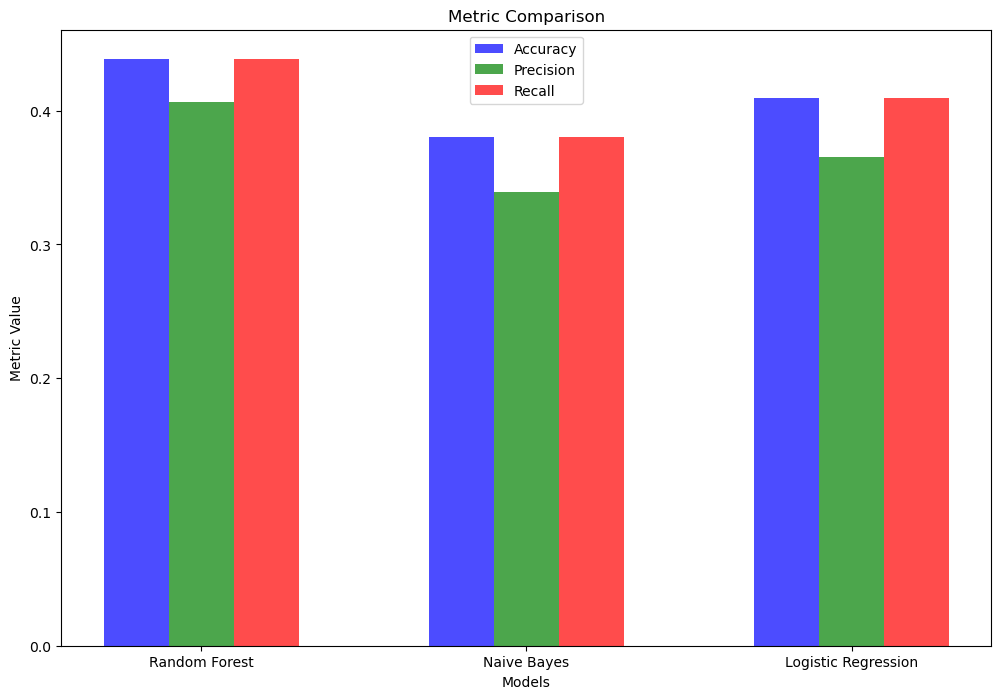

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc
# Obtener todos los valores únicos de y_train
evaluate_classification_models(X_train,y_train)



Podemos evidenciar que el f-score presenta mejoría y además la curva ROC obtiene mejores resultados